<a href="https://colab.research.google.com/github/AJSTYLE-lab/Fundamental-of-BIg-Data-Analysis/blob/main/BIG%20DATA%20LABS/LAB%234/L21_7692.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORITNG LIBRARIES:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing 
from scipy.cluster.hierarchy import linkage, dendrogram
import math
dist = lambda a,b: math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


#IMPORTING .csv FILE:

In [ ]:
FILE=pd.read_csv("Mall_Customers.csv")
FILE


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#TASK A:

#USING Annual Income (k$) & Spending Score(1-100):

In [ ]:
X = FILE.iloc[:, [3, 4]].values
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
labels = model.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#TASK B:

#CONVERTING "Genre" column in 0,1 form(1 for Male and 0 for Female): 

In [ ]:
FILE['Genre'] = preprocessing.LabelEncoder().fit_transform(FILE['Genre'])
FILE.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


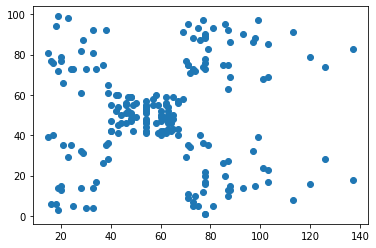

In [ ]:
plt.scatter(FILE["Annual Income (k$)"],FILE["Spending Score (1-100)"])
plt.show()

In [ ]:
n=len(FILE["Annual Income (k$)"])
distance_matrix = np.zeros((n,n))


#CALCULATING DISTANCE AND STORE IT INTO MATRIX FORM:

In [ ]:
for i in range(0,n):
    for j in range(i, n):
        distance_matrix[i,j] = dist(X[i], X[j])
        distance_matrix[j,i] = distance_matrix[i,j] 
distance_matrix


array([[  0.        ,  42.        ,  33.01514804, ..., 116.38728453,
        123.79418403, 129.69194269],
       [ 42.        ,   0.        ,  75.00666637, ..., 111.22050171,
        137.3062271 , 122.01639234],
       [ 33.01514804,  75.00666637,   0.        , ..., 129.32130528,
        121.59358536, 143.42245291],
       ...,
       [116.38728453, 111.22050171, 129.32130528, ...,   0.        ,
         57.07013229,  14.2126704 ],
       [123.79418403, 137.3062271 , 121.59358536, ...,  57.07013229,
          0.        ,  65.        ],
       [129.69194269, 122.01639234, 143.42245291, ...,  14.2126704 ,
         65.        ,   0.        ]])

#SINGLE METHOD:

<ipython-input-16-9631bf95bce2>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_clustering = linkage(distance_matrix, method="single")


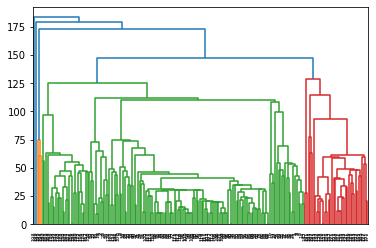

In [ ]:
single_clustering = linkage(distance_matrix, method="single")
dendrogram(single_clustering)
plt.show()

#Ward’s Method:

<ipython-input-17-5deb56ef122a>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_clustering = linkage(distance_matrix, method="ward")


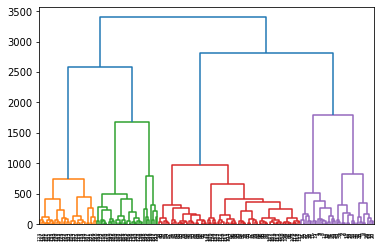

In [ ]:
single_clustering = linkage(distance_matrix, method="ward")
dendrogram(single_clustering)
plt.show()

#Complete Method:

<ipython-input-18-577ff1c8771b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_clustering = linkage(distance_matrix, method="complete")


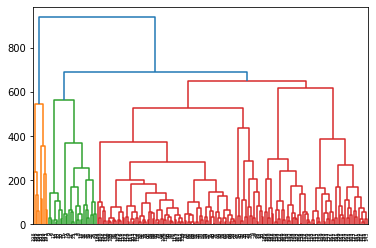

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 10.        ,  14.        ,   8.67079018,   2.        ],
       [ 64.        ,  66.        ,   9.47470919,   2.        ],
       [170.        , 174.        ,   9.5105562 ,   2.        ],
       [ 67.        ,  69.        ,   9.51167573,   2.        ],
       [ 60.        ,  61.        ,   9.59839789,   2.        ],
       [ 78.        ,  80.        ,   9.72826138,   2.        ],
       [ 74.        ,  77.        ,   9.73165637,   2.        ],
       [ 75.        ,  76.        ,   9.78744194,   2.        ],
       [ 98.        , 105.        ,   9.83930963,   2.        ],
       [ 92.        ,  97.        ,   9.92856017,   2.        ],
       [119.        , 120.        ,   9.95475887,   2.        ],
       [107.        , 113

In [ ]:
single_clustering = linkage(distance_matrix, method="complete")
dendrogram(single_clustering)
plt.show()
single_clustering


#AVERAGE METHOD:

<ipython-input-19-4010e089c4b2>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_clustering = linkage(distance_matrix, method="average")


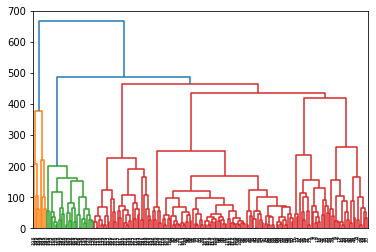

In [ ]:
single_clustering = linkage(distance_matrix, method="average")
dendrogram(single_clustering)
plt.show()

